In [224]:
! pip install pmdarima


You should consider upgrading via the 'c:\users\satyaki dixit\anaconda3\python.exe -m pip install --upgrade pip' command.


In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
# from sklearn.

In [226]:
# Loading the data
Covid_data = pd.read_csv('covid_19_data.csv')
Covid_data_19_confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
Covid_data_19_confirmed_US = pd.read_csv('time_series_covid_19_confirmed_US.csv')
Covid_data_19_deaths = pd.read_csv('time_series_covid_19_deaths.csv')
Covid_data_19_deaths_US = pd.read_csv('time_series_covid_19_deaths_US.csv')
Covid_data_19_recovered = pd.read_csv('time_series_covid_19_recovered.csv')

In [227]:
# Shape of the data
Covid_data.shape

(306429, 8)

In [228]:
# Checking for null values
Covid_data.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [229]:
# Province/State column has a total of 82223 NaN or Unknown Values so we will remove the Province/State column 
Covid_data.drop(['Province/State'], inplace = True, axis = 1)

In [230]:
# Third dataset
Covid_data_19_confirmed_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,7049,7106,7113,7118,7118,7126,7135,7141,7142,7142
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,21489,21511,21535,21546,21554,21578,21593,21606,21620,21620
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2326,2327,2328,2328,2328,2331,2331,2333,2334,2334
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2656,2657,2656,2658,2659,2660,2662,2666,2664,2664
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6816,6826,6829,6832,6832,6847,6856,6862,6864,6864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,3775,3776,3776,3776,3780,3780,3781,3781,3784,3784
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,2251,2246,2246,2246,2252,2261,2263,2264,2266,2266
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,921,921,921,921,921,921,922,922,922,922


In [231]:
# Second Dataset 
Covid_data_19_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751


In [232]:
# Droping Province/Sate from the Covid data 19 confirmed data
Covid_data_19_confirmed.drop(['Province/State'], inplace = True, axis = 1)

In [233]:
# Fourth datatset
Covid_data_19_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [234]:
# Converting Date column to datetime column
Confirmed_cases_US = pd.DataFrame(Covid_data_19_confirmed.iloc[251,3:])
Confirmed_cases_US = Confirmed_cases_US.reset_index()
Confirmed_cases_US.columns = ['Date','Value']
Confirmed_cases_US['Date'] = pd.to_datetime(Confirmed_cases_US['Date'])

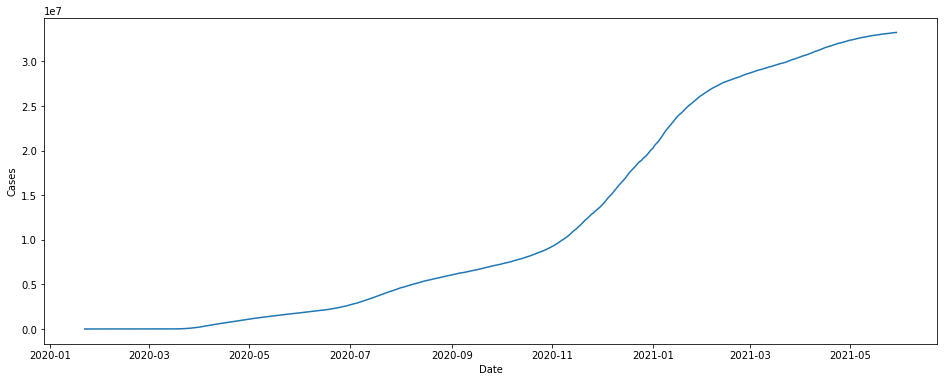

In [235]:
# Trend in Covid-19 Confirmed Cases
plt.figure(figsize = (16,6))
plt.plot(Confirmed_cases_US.Date,Confirmed_cases_US['Value'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [236]:
# Dropping Province/State column from the Covid_19_death data
Covid_data_19_deaths.drop(['Province/State'], inplace = True, axis = 1)

In [237]:
# Changing Date column type into datetime column
Deaths_cases_US = pd.DataFrame(Covid_data_19_deaths.iloc[251,3:])
Deaths_cases_US = Deaths_cases_US.reset_index()
Deaths_cases_US.columns = ['Date','Value']
Deaths_cases_US['Date'] = pd.to_datetime(Deaths_cases_US['Date'])

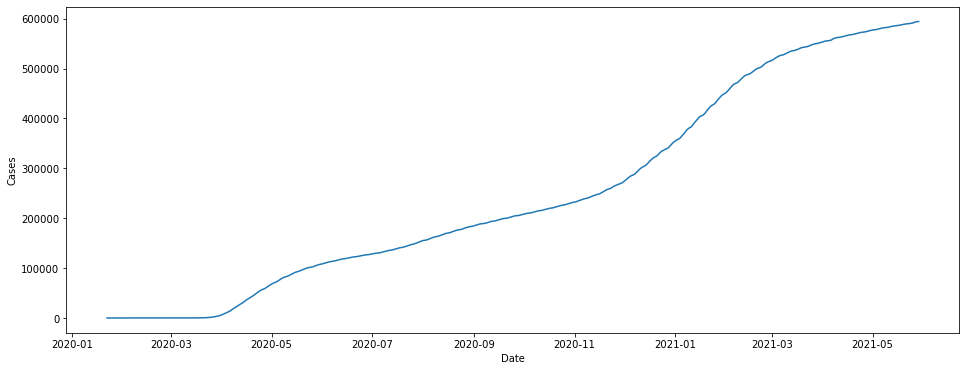

In [238]:
# Trend in Covid-19 Deaths in US
plt.figure(figsize = (16,6))
plt.plot(Deaths_cases_US.Date,Deaths_cases_US['Value'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [239]:
# Creating a DataFrame that includes Combined data of all Countries listed about confirmed, recovered, and deaths Covid Cases
World_Covid_19_data_confirmed = pd.DataFrame(Covid_data_19_confirmed.iloc[:,3:].sum())
World_Covid_19_data_death = pd.DataFrame(Covid_data_19_deaths.iloc[:,3:].sum(), columns = ['Death_Value']).reset_index()
World_Covid_19_data_recovered = pd.DataFrame(Covid_data_19_recovered.iloc[:,4:].sum(), columns = ['Recovered_Value']).reset_index()
World_Covid_19_data_recovered.columns = ['Date1','Recovered_Cases']
World_Covid_19_data = World_Covid_19_data_confirmed.reset_index()
World_Covid_19_data.columns = ['Date','Confirmed_Value']
World_Covid_19_data['Date'] = pd.to_datetime(World_Covid_19_data['Date'])
World_Covid_19_data = World_Covid_19_data.join([World_Covid_19_data_death])
Final_Covid_19_Data = World_Covid_19_data.join([World_Covid_19_data_recovered])

In [240]:
# Removing all previous References
del World_Covid_19_data_death
del World_Covid_19_data_recovered
del World_Covid_19_data_confirmed

In [241]:
# Dropping duplicate columns 
Final_Covid_19_Data.drop(['index','Date1'], inplace = True, axis = 1)

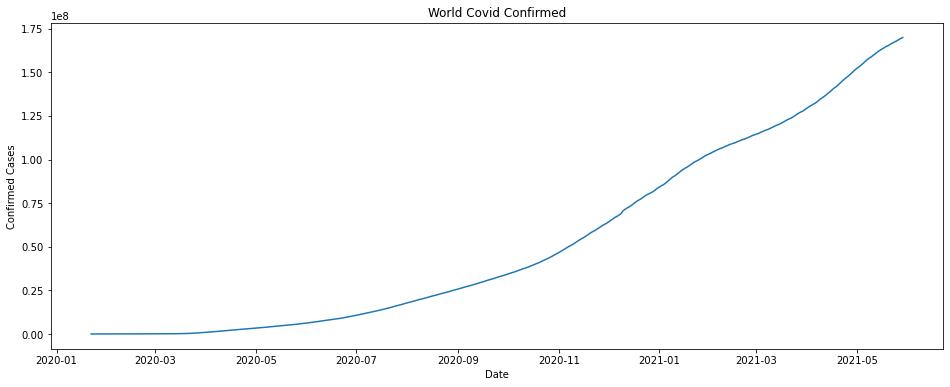

In [242]:
# Checking trend for Confirmed Covid Cases
plt.figure(figsize = (16,6))
plt.plot(Final_Covid_19_Data['Date'],Final_Covid_19_Data['Confirmed_Value'])
plt.title('World Covid Confirmed')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.show()

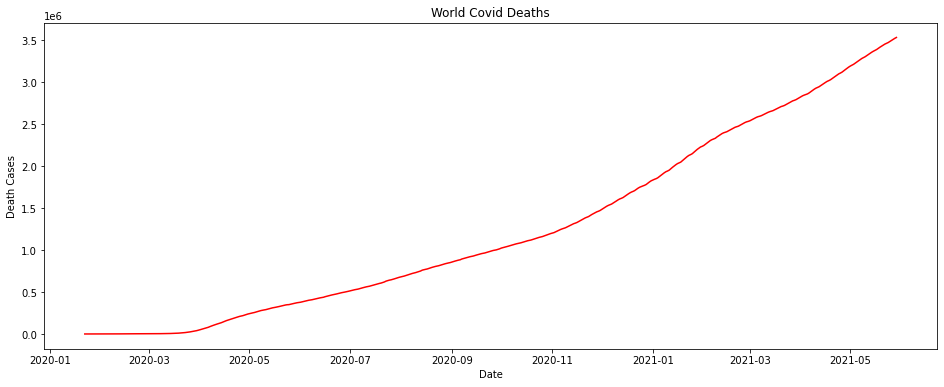

In [243]:
# Checking trend for death cases
plt.figure(figsize = (16,6))
plt.plot(Final_Covid_19_Data['Date'],Final_Covid_19_Data['Death_Value'], color = 'Red')
plt.title('World Covid Deaths')
plt.ylabel('Death Cases')
plt.xlabel('Date')
plt.show()

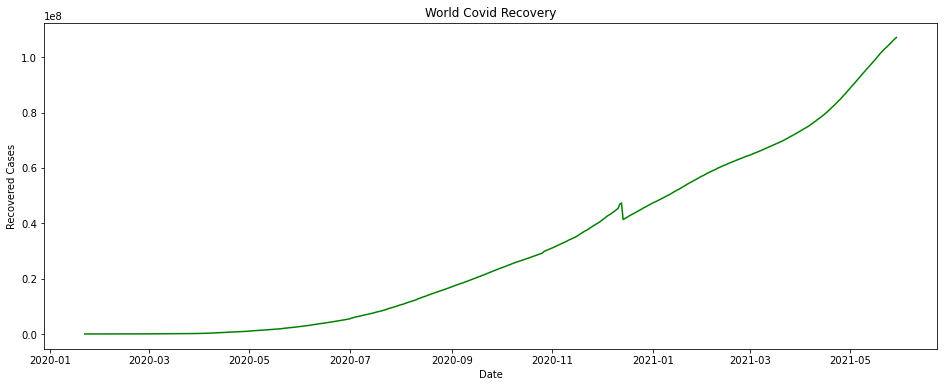

In [244]:
# Checking trend for Death Cases
plt.figure(figsize = (16,6))
plt.plot(Final_Covid_19_Data['Date'],Final_Covid_19_Data['Recovered_Cases'], color = 'Green')
plt.title('World Covid Recovery')
plt.ylabel('Recovered Cases')
plt.xlabel('Date')
plt.show()

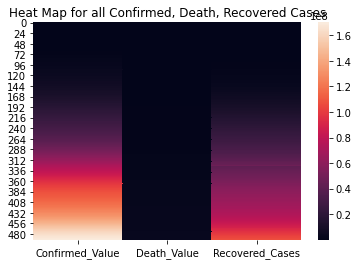

In [245]:
# Drawing heat map for all Confirmed, Death, and Recovered Cases
sns.heatmap(data = Final_Covid_19_Data.iloc[:,1:])
plt.title('Heat Map for all Confirmed, Death, Recovered Cases')
plt.show()

In [246]:
# Storing correlation values 
corr = Final_Covid_19_Data.iloc[:,1:].corr()

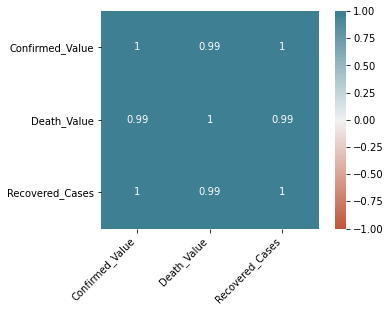

In [247]:
# correlation Heat Map
ax = sns.heatmap(
    corr, 
    annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

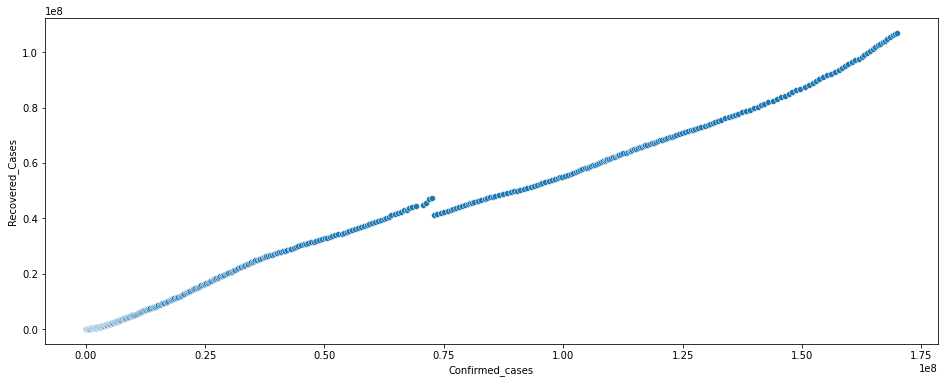

In [248]:
# Scatterplot of Total Confirmed cases vs Total Recovered cases
plt.figure(figsize = (16,6))
sns.scatterplot(x = Final_Covid_19_Data['Confirmed_Value'],y = Final_Covid_19_Data['Recovered_Cases'])
plt.xlabel('Confirmed_cases')
plt.ylabel('Recovered_Cases')
plt.show()

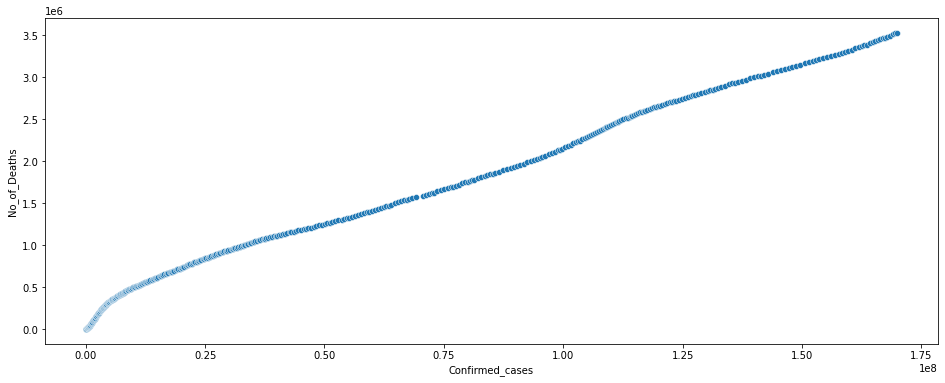

In [249]:
# Scatterplot of Total Confirmed cases vs Total Deaths
plt.figure(figsize = (16,6))
sns.scatterplot(x = Final_Covid_19_Data['Confirmed_Value'],y = Final_Covid_19_Data['Death_Value'])
plt.xlabel('Confirmed_cases')
plt.ylabel('No_of_Deaths')
plt.show()

In [250]:
# Getting top 10 countries with confirmed cases of Covid 
Country_wise_cases = Covid_data.groupby(['Country/Region']).sum()
Top_10_Confirmed = Country_wise_cases.sort_values(by = ['Confirmed'] , ascending = False)[:10]

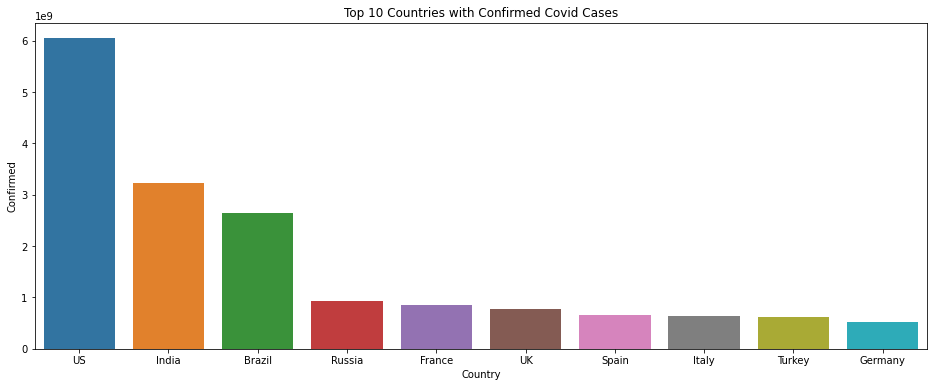

In [251]:
# Plotting top 10 countries with confirmed cases of Covid
plt.figure(figsize = (16,6))
sns.barplot(x = Top_10_Confirmed.index, y = Top_10_Confirmed['Confirmed'])
plt.xlabel('Country')
plt.title('Top 10 Countries with Confirmed Covid Cases')
plt.show()

In [252]:
# Getting top 10 countries with death cases of Covid 
Top_10_Deaths = Country_wise_cases.sort_values(by = ['Deaths'] , ascending = False)[:10]

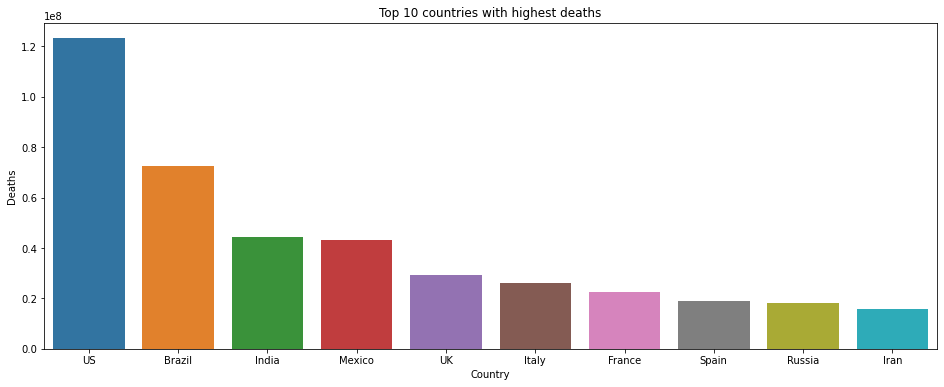

In [253]:
# Plotting top 10 countries with death cases of Covid
plt.figure(figsize = (16,6))
sns.barplot(x = Top_10_Deaths.index ,y = Top_10_Deaths['Deaths'])
plt.title('Top 10 countries with highest deaths')
plt.xlabel('Country')
plt.show()

In [254]:
# Getting top 10 countries with Recovered cases of Covid 
Top_10_Recovered = Country_wise_cases.sort_values(by = ['Recovered'], ascending = False)[:10]

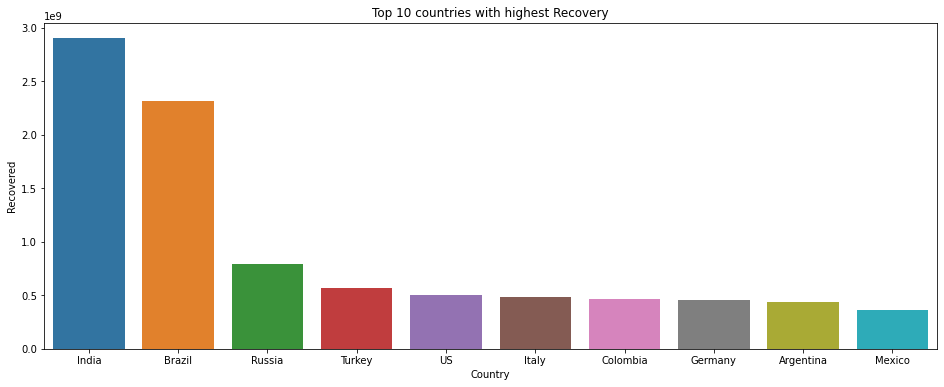

In [255]:
# Plotting top 10 countries with Recovered cases of Covid
plt.figure(figsize = (16,6))
sns.barplot(x = Top_10_Recovered.index ,y = Top_10_Recovered['Recovered'])
plt.title('Top 10 countries with highest Recovery')
plt.xlabel('Country')
plt.show()

## Covid data for the all countries present in the dataset

In [256]:
# Getting Covid cases per day 
Cases_per_day = Final_Covid_19_Data.set_index('Date').diff().reset_index()
Cases_per_day.rename(columns= {'Confirmed_Value':'Confirmed_cases'}, inplace = True)

In [257]:
# dropping index
Cases_per_day.drop(index = 0, inplace = True)

In [258]:
# Plotting Confirmed cases per day 
import plotly.express as px
fig = px.bar(Cases_per_day, x = 'Date', y = 'Confirmed_cases',title = 'Covid-19 Confirmed cases per day')
fig.show()

In [259]:
# Covid-19 deaths per day 
fig = px.bar(Cases_per_day, x = 'Date', y = 'Death_Value',title = 'Covid-19 Deaths per day')
fig.show()

## Reading Vaccination data

In [260]:
# Reading Vaccination dateset
Vaccination_dataset = pd.read_csv('country_vaccinations.csv')

In [261]:
# Reading Vaccine type data
vaccine_type = pd.read_csv('country_vaccinations_by_manufacturer.csv' )

In [262]:
vaccine_type

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-05,Johnson&Johnson,0
1,Austria,2021-01-05,Moderna,0
2,Austria,2021-01-05,Oxford/AstraZeneca,0
3,Austria,2021-01-05,Pfizer/BioNTech,30859
4,Austria,2021-01-12,Johnson&Johnson,0
...,...,...,...,...
7127,Uruguay,2021-06-13,Pfizer/BioNTech,765869
7128,Uruguay,2021-06-13,Sinovac,2444890
7129,Uruguay,2021-06-14,Oxford/AstraZeneca,43078
7130,Uruguay,2021-06-14,Pfizer/BioNTech,779983


In [263]:
Vaccination_dataset

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24615,Zimbabwe,ZWE,2021-06-10,1089506.0,690452.0,399054.0,5523.0,5857.0,7.33,4.65,2.68,394.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1404519668...
24616,Zimbabwe,ZWE,2021-06-11,1096854.0,691251.0,405603.0,7348.0,5802.0,7.38,4.65,2.73,390.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1404519668...
24617,Zimbabwe,ZWE,2021-06-12,1103398.0,692180.0,411218.0,6544.0,5921.0,7.42,4.66,2.77,398.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1404519668...
24618,Zimbabwe,ZWE,2021-06-13,1107058.0,693147.0,413911.0,3660.0,5564.0,7.45,4.66,2.78,374.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1404519668...


In [264]:
Vaccination_dataset.info()      # Checking for Column values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24620 entries, 0 to 24619
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              24620 non-null  object 
 1   iso_code                             24620 non-null  object 
 2   date                                 24620 non-null  object 
 3   total_vaccinations                   13858 non-null  float64
 4   people_vaccinated                    13060 non-null  float64
 5   people_fully_vaccinated              10392 non-null  float64
 6   daily_vaccinations_raw               11461 non-null  float64
 7   daily_vaccinations                   24389 non-null  float64
 8   total_vaccinations_per_hundred       13858 non-null  float64
 9   people_vaccinated_per_hundred        13060 non-null  float64
 10  people_fully_vaccinated_per_hundred  10392 non-null  float64
 11  daily_vaccinations_per_milli

In [265]:
Vaccination_dataset.isna().sum()     # Checking for null values

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     10762
people_vaccinated                      11560
people_fully_vaccinated                14228
daily_vaccinations_raw                 13159
daily_vaccinations                       231
total_vaccinations_per_hundred         10762
people_vaccinated_per_hundred          11560
people_fully_vaccinated_per_hundred    14228
daily_vaccinations_per_million           231
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [266]:
Vaccination_dataset_with_Nan = Vaccination_dataset.dropna(axis = 0)  # Dropping null values

In [267]:
Vaccination_dataset_with_Nan['date'] = pd.to_datetime(Vaccination_dataset_with_Nan['date'])  #Converting to datetime object

<ipython-input-267-378c3e96fd81>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [268]:
Vaccination_dataset_with_Nan

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.52,1.23,0.29,167.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.62,1.24,0.38,136.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
152,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
234,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.63,15.32,6.31,4225.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
235,Albania,ALB,2021-05-12,632676.0,444755.0,187921.0,10169.0,10870.0,21.98,15.45,6.53,3777.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24615,Zimbabwe,ZWE,2021-06-10,1089506.0,690452.0,399054.0,5523.0,5857.0,7.33,4.65,2.68,394.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1404519668...
24616,Zimbabwe,ZWE,2021-06-11,1096854.0,691251.0,405603.0,7348.0,5802.0,7.38,4.65,2.73,390.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1404519668...
24617,Zimbabwe,ZWE,2021-06-12,1103398.0,692180.0,411218.0,6544.0,5921.0,7.42,4.66,2.77,398.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1404519668...
24618,Zimbabwe,ZWE,2021-06-13,1107058.0,693147.0,413911.0,3660.0,5564.0,7.45,4.66,2.78,374.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1404519668...


Timestamp('2021-06-14 00:00:00')

In [269]:
Final_List = Vaccination_dataset_with_Nan.groupby(['country']).tail(1)

In [270]:
Final_List

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.62,1.24,0.38,136.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
267,Albania,ALB,2021-06-13,836430.0,504257.0,332173.0,1562.0,5401.0,29.06,17.52,11.54,1877.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
467,Andorra,AND,2021-04-05,15269.0,9781.0,4484.0,2829.0,573.0,19.76,12.66,5.80,7416.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
872,Antigua and Barbuda,ATG,2021-06-07,57264.0,34368.0,22896.0,1686.0,991.0,58.48,35.10,23.38,10120.0,Oxford/AstraZeneca,Ministry of Health,https://covid19.gov.ag
1045,Argentina,ARG,2021-06-14,16382043.0,13043304.0,3338739.0,95141.0,292268.0,36.25,28.86,7.39,6467.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23893,Uruguay,URY,2021-06-14,3304291.0,2094805.0,1209486.0,50454.0,34804.0,95.12,60.30,34.82,10019.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Ministry of Health via vacuna.uy,https://monitor.uruguaysevacuna.gub.uy/
24179,Vietnam,VNM,2021-06-14,1552651.0,1493043.0,59608.0,54328.0,30365.0,1.60,1.53,0.06,312.0,Oxford/AstraZeneca,Government of Vietnam,https://suckhoedoisong.vn/sang-15-6-them-71-ca...
24341,Wales,OWID_WLS,2021-06-13,3600704.0,2216031.0,1384673.0,9644.0,23997.0,114.20,70.29,43.92,7611.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
24498,Zambia,ZMB,2021-05-29,147033.0,141747.0,5286.0,388.0,1743.0,0.80,0.77,0.03,95.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Government of Zambia,https://www.facebook.com/mohzambia/posts/19235...


In [271]:
# Total vaccination done till last date in the dataset
import plotly.express as ax
fig = ax.scatter(Final_List,x = 'country', y = 'total_vaccinations', title = 'Total Vaccinations')
fig.show()

In [272]:
# Plotting the graph between people_vaccinated(first_dose) to people_fully_vaccinated(first_and_second_dose both)
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=Final_List['country'], y=Final_List['people_vaccinated'],
                    mode='markers',
                    name='People_Vaccinated'))
fig.add_trace(go.Scatter(x=Final_List['country'], y=Final_List['people_fully_vaccinated'],
                    mode='markers',
                    name='people_fully_vaccinated'))

In [273]:
Final_List

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.62,1.24,0.38,136.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
267,Albania,ALB,2021-06-13,836430.0,504257.0,332173.0,1562.0,5401.0,29.06,17.52,11.54,1877.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
467,Andorra,AND,2021-04-05,15269.0,9781.0,4484.0,2829.0,573.0,19.76,12.66,5.80,7416.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
872,Antigua and Barbuda,ATG,2021-06-07,57264.0,34368.0,22896.0,1686.0,991.0,58.48,35.10,23.38,10120.0,Oxford/AstraZeneca,Ministry of Health,https://covid19.gov.ag
1045,Argentina,ARG,2021-06-14,16382043.0,13043304.0,3338739.0,95141.0,292268.0,36.25,28.86,7.39,6467.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23893,Uruguay,URY,2021-06-14,3304291.0,2094805.0,1209486.0,50454.0,34804.0,95.12,60.30,34.82,10019.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Ministry of Health via vacuna.uy,https://monitor.uruguaysevacuna.gub.uy/
24179,Vietnam,VNM,2021-06-14,1552651.0,1493043.0,59608.0,54328.0,30365.0,1.60,1.53,0.06,312.0,Oxford/AstraZeneca,Government of Vietnam,https://suckhoedoisong.vn/sang-15-6-them-71-ca...
24341,Wales,OWID_WLS,2021-06-13,3600704.0,2216031.0,1384673.0,9644.0,23997.0,114.20,70.29,43.92,7611.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
24498,Zambia,ZMB,2021-05-29,147033.0,141747.0,5286.0,388.0,1743.0,0.80,0.77,0.03,95.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Government of Zambia,https://www.facebook.com/mohzambia/posts/19235...


In [274]:
# getting the list of vaccine type
Vaccines_list = vaccine_type.groupby(['location']).tail(1)

In [275]:
# plotting the vaccine vs total_vaccinations graph
fig = ax.bar(Vaccines_list, x= 'vaccine', y = 'total_vaccinations', title = 'Types of Vaccine used')
fig.show()

In [276]:
# Total vaccination by Vaccine type
fig = ax.scatter(Vaccines_list ,x = 'location', y = 'total_vaccinations',
                 title = 'Total Vaccinations',hover_data=['vaccine']
                )
fig.show()

In [277]:
#Checking for null values
Vaccination_dataset.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     10762
people_vaccinated                      11560
people_fully_vaccinated                14228
daily_vaccinations_raw                 13159
daily_vaccinations                       231
total_vaccinations_per_hundred         10762
people_vaccinated_per_hundred          11560
people_fully_vaccinated_per_hundred    14228
daily_vaccinations_per_million           231
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [278]:
# getting world daily vaccination records
vaccinated = Vaccination_dataset.groupby(['date']).sum()

In [279]:
# Plotting world vaccination record 
daily_vacc = ax.scatter(vaccinated, x = vaccinated.index, y = 'daily_vaccinations', title = 'World Daily Vaccinations')
daily_vacc.show()

In [280]:
# making Date column Index
Cases_per_day = Cases_per_day.set_index('Date') 

In [281]:
# inner join on vaccinated and Cases per day
cases_vaccine_table = Cases_per_day.join(vaccinated, how = 'inner')

In [282]:
# table
cases_vaccine_table

,Confirmed_cases,Death_Value,Recovered_Cases,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
2020-12-02,651398.0,12589.0,462926.0,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
2020-12-03,694328.0,12575.0,426984.0,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
2020-12-04,683276.0,12520.0,490617.0,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
2020-12-05,642163.0,10289.0,435948.0,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
2020-12-06,538754.0,7428.0,316044.0,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,531845.0,12752.0,577063.0,1.758939e+09,787306323.0,411705841.0,31673003.0,30586572.0,4937.02,3026.58,1636.57,803348.0
2021-05-26,568216.0,12756.0,555813.0,1.732114e+09,759459715.0,393839967.0,35288460.0,31702775.0,4601.66,2764.79,1531.39,830333.0
2021-05-27,554368.0,12753.0,697358.0,1.733896e+09,754607770.0,392205529.0,32146257.0,31886178.0,4616.69,2839.16,1626.42,828231.0
2021-05-28,499934.0,11820.0,554963.0,1.745717e+09,741814911.0,388275963.0,31532607.0,32072761.0,4871.51,2894.57,1697.43,821874.0


In [283]:
# daily vaccination recorded
cases_vaccine_table['daily_vaccinations']

2020-12-02           0.0
2020-12-03           0.0
2020-12-04           0.0
2020-12-05           0.0
2020-12-06           0.0
                 ...    
2021-05-25    30586572.0
2021-05-26    31702775.0
2021-05-27    31886178.0
2021-05-28    32072761.0
2021-05-29    32692442.0
Name: daily_vaccinations, Length: 179, dtype: float64

In [284]:
# Confirmed and Death Cases with Daily Vaccinations Data

fig = go.Figure()


fig.add_trace(go.Scatter(x=cases_vaccine_table.index, y=cases_vaccine_table['Death_Value'],
                    mode='lines+markers',
                    name='Death_Cases'))
fig.add_trace(go.Scatter(x=cases_vaccine_table.index, y=cases_vaccine_table['Confirmed_cases'],
                    mode='lines+markers',
                    name='Confirm_Cases'))
fig.add_trace(go.Scatter(x=cases_vaccine_table.index, y=cases_vaccine_table['daily_vaccinations'],
                    mode='lines+markers',
                    name='vaccinations'))


In [285]:
Final_Covid_19_Data

,Date,Confirmed_Value,Death_Value,Recovered_Cases
0,2020-01-22,557,17,30
1,2020-01-23,655,18,32
2,2020-01-24,941,26,39
3,2020-01-25,1433,42,42
4,2020-01-26,2118,56,56
...,...,...,...,...
489,2021-05-25,167848207,3485788,104824935
490,2021-05-26,168416423,3498544,105380748
491,2021-05-27,168970791,3511297,106078106
492,2021-05-28,169470725,3523117,106633069


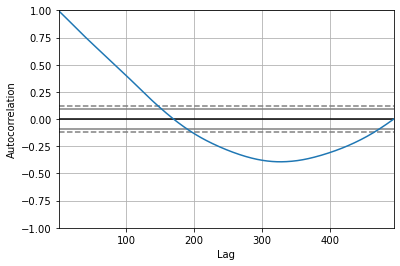

In [286]:
# Correlation plot on Confirmed cases
autocorrelation_plot(Final_Covid_19_Data['Confirmed_Value'])
plt.show()

In [287]:
# Cases_per_day.iloc[0,0] = Final_Covid_19_Data.iloc[0,1]
# Cases_per_day.iloc[0,1] = Final_Covid_19_Data.iloc[0,2]
# Cases_per_day.iloc[0,2] = Final_Covid_19_Data.iloc[0,3]

In [288]:
Cases_per_day

,Confirmed_cases,Death_Value,Recovered_Cases
Date,,,
2020-01-23,98.0,1.0,2.0
2020-01-24,286.0,8.0,7.0
2020-01-25,492.0,16.0,3.0
2020-01-26,685.0,14.0,14.0
2020-01-27,809.0,26.0,9.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


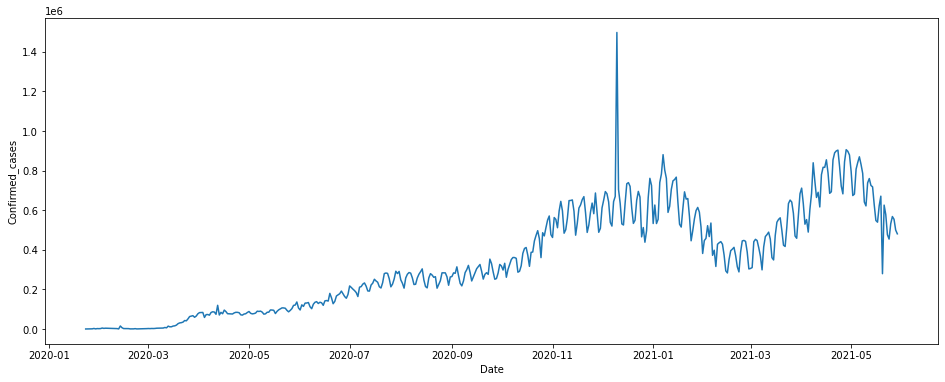

In [289]:
# Checking for any outlier
plt.figure(figsize= (16,6))
sns.lineplot(data = Cases_per_day, x = Cases_per_day.index, y = 'Confirmed_cases')
plt.show()

In [290]:
Cases_per_day = Cases_per_day.reset_index()     #reset index

In [291]:
Cases_per_day.drop(index = 322, inplace = True)     #dropped index number 322

## Checking for Stationarity

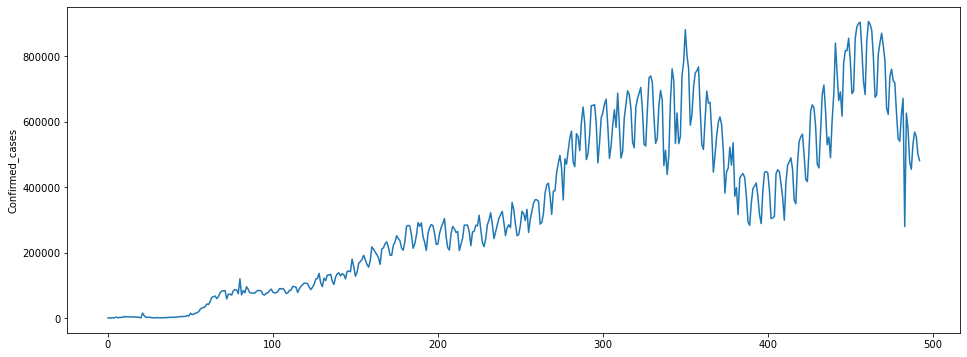

In [292]:
# Checking for stationary by plots
plt.figure(figsize= (16,6))
sns.lineplot(data = Cases_per_day, x = Cases_per_day.index, y = 'Confirmed_cases')
plt.show()

In [293]:
# Checking for stationary by Summary Statistics
split = round(len(Cases_per_day['Confirmed_cases']) / 2 )
X1, X2 = Cases_per_day['Confirmed_cases'][0:split], Cases_per_day['Confirmed_cases'][split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=131206.569106, mean2=553560.869919
variance1=10429504899.201323, variance2=25078623755.811592


In [294]:
# Checking for Stationary by Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(Cases_per_day['Confirmed_cases'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.633589
p-value: 0.465613
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


<b>As P value is greater than 0.05, means that we fail to reject the Null Hypothesis that the Time Series is non-Stationary, Therefore, Time Series is non-Stationary.</b>

<b>As Time Series is non-Stationary we have to use ARIMA model to forecast predictions</b>

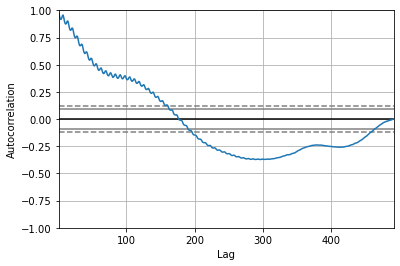

In [295]:
# AutoCorrelation Plot 
autocorrelation_plot(Cases_per_day['Confirmed_cases'])
plt.show()

A value of p equal to 155 seems right according to the above plot

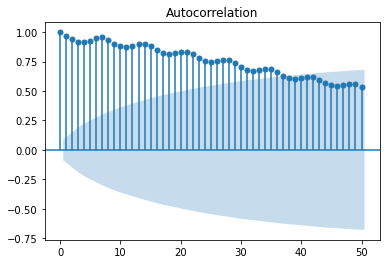

In [296]:
# Partial Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Cases_per_day['Confirmed_cases'] ,lags = 50)
plt.show()

## Fitting into ARIMA model to predict Confirmed Cases

In [297]:
model = ARIMA(Cases_per_day['Confirmed_cases'], order=(21,2,0))
model_fit = model.fit()

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [298]:
# summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        Confirmed_cases   No. Observations:                  492
Model:                ARIMA(21, 2, 0)   Log Likelihood               -5860.964
Date:                Sat, 03 Jul 2021   AIC                          11765.928
Time:                        13:31:44   BIC                          11858.204
Sample:                             0   HQIC                         11802.168
                                - 492                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4900      0.024    -62.731      0.000      -1.537      -1.443
ar.L2         -1.8198      0.055    -33.335      0.000      -1.927      -1.713
ar.L3         -2.0854      0.076    -27.389      0.0

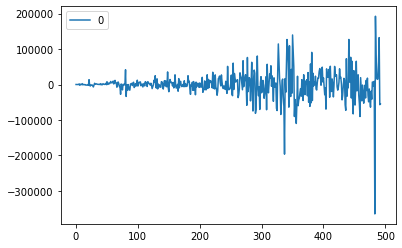

In [299]:
#PLotting the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

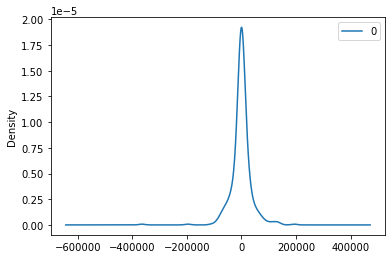

In [300]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [301]:
# Stat summary for residuals
print(residuals.describe())

                   0
count     492.000000
mean     -516.749203
std     37600.246513
min   -364902.219184
25%    -11574.075312
50%       111.576495
75%      9862.045374
max    192559.858714


In [302]:
#split into test and train
X = Cases_per_day['Confirmed_cases']
size = int(len(X) * 0.70)
train , test = X[0:size] , X[size:len(X)]
history = [x for x in train]
predictions = list()
Forecasting = list()

In [303]:
# Prediction for test data and Forecast for 100 days from the last prediction of confirmed covid cases
for t in range(len(test) + 100): 
    model = ARIMA(history, order = (21,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    if t >= 148:
        Forecasting.append(yhat)
        print('Forecasted data:- ', (yhat))
    else:
        predictions.append(yhat)
        obs = test.iloc[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=508807.960615, expected=626359.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=574075.068188, expected=532796.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=601167.424173, expected=554118.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=639010.173156, expected=740122.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=751599.303092, expected=783372.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=656566.246639, expected=880837.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=620044.043010, expected=803222.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=736940.374183, expected=760994.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=695916.205102, expected=589134.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=629157.574252, expected=619930.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=778490.821234, expected=705508.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=825678.258188, expected=748388.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=817409.819528, expected=755228.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=683951.364076, expected=767187.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=705867.641695, expected=639144.000000
predicted=550514.704922, expected=529212.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=555106.049695, expected=515066.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=625427.737927, expected=608426.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=697212.826606, expected=692937.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=691179.603222, expected=656323.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=677801.761369, expected=659061.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=583989.204451, expected=568124.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=502820.847646, expected=445654.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=486918.751809, expected=497340.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=591763.288152, expected=556238.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=670545.619222, expected=598361.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=607950.637422, expected=614251.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=630708.631205, expected=590443.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=519743.223887, expected=515330.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=439938.910952, expected=381639.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=438819.026885, expected=446774.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=516521.232830, expected=457957.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=519292.162007, expected=521981.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=554360.915116, expected=466907.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=470782.432733, expected=535428.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=455436.156024, expected=372125.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=311638.384548, expected=398078.000000
predicted=388419.755851, expected=315893.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=405425.381201, expected=428033.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=435471.205834, expected=435741.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=454389.009877, expected=441465.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=442815.936533, expected=428689.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=353592.761481, expected=373301.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=332223.818723, expected=293850.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=303524.501753, expected=283166.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=348224.919647, expected=351020.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=394978.050057, expected=395555.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=391364.225096, expected=403516.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=398385.682466, expected=412519.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=332115.577815, expected=370455.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=292049.856711, expected=314446.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=297507.341293, expected=288438.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=349355.960709, expected=388853.000000
predicted=396766.182288, expected=444936.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=457035.023950, expected=447478.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=423688.524924, expected=443039.000000
predicted=397367.653625, expected=389230.000000
predicted=333942.145470, expected=303509.000000
predicted=306869.602760, expected=305864.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=384374.375914, expected=310288.000000
predicted=389901.809289, expected=441142.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=430997.458730, expected=453049.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=440872.417215, expected=447054.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=371620.652416, expected=410533.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=330842.118542, expected=368312.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=335386.262626, expected=298723.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=346151.549124, expected=414665.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=468445.793058, expected=467079.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=498621.882082, expected=476896.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=458470.139930, expected=489328.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=454185.340986, expected=454116.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=386634.664391, expected=360385.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=343796.000829, expected=348901.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=420889.893103, expected=473013.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=507905.377873, expected=539285.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=533602.932003, expected=553723.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=535753.692568, expected=561679.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=492654.457052, expected=498820.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=427692.030718, expected=423315.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=411984.769094, expected=416821.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=502491.466499, expected=514245.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=577483.358162, expected=633581.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=629537.479557, expected=651350.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=617974.208089, expected=641351.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=571328.528635, expected=584592.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=502757.958169, expected=469958.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=471687.492103, expected=458405.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=555884.031995, expected=568273.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=659659.851695, expected=683205.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=693498.638888, expected=711787.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=686940.093268, expected=633739.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=583254.007885, expected=529443.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=451424.154383, expected=552803.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=526221.825737, expected=489584.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=601908.714092, expected=604087.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=686951.525521, expected=684346.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=711354.771875, expected=839850.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=713504.443546, expected=748045.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=656602.945438, expected=664507.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=604442.953529, expected=690741.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=650315.057338, expected=616625.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=696305.465039, expected=779567.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=842902.061447, expected=817025.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=909121.146608, expected=816761.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=787626.921048, expected=854855.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=767343.788672, expected=788042.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=744156.421053, expected=685495.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=676563.550594, expected=693422.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=790554.136459, expected=854425.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=890435.339590, expected=889975.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=898951.486458, expected=899755.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=881399.816286, expected=903747.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=834244.975469, expected=820940.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=754165.460654, expected=722356.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=759587.704887, expected=682784.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=803272.304606, expected=844470.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=915788.063554, expected=905992.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=945730.547854, expected=897602.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=870031.629535, expected=879014.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=818885.733314, expected=796679.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=718317.714550, expected=674348.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=688310.165162, expected=681590.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=810592.004765, expected=807436.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=878019.405529, expected=841224.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=861247.618663, expected=869972.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=848945.129776, expected=831558.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=755369.167862, expected=786546.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=675779.607643, expected=641539.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=676907.044717, expected=621929.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=744137.002162, expected=738473.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=804858.254314, expected=760099.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=797917.603482, expected=725275.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=735933.145487, expected=718060.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=677997.048822, expected=627518.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=538452.794146, expected=548206.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=540716.154767, expected=539694.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=642131.074182, expected=622185.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=665740.282182, expected=671092.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=664376.686027, expected=279413.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=407393.309056, expected=625876.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=467553.053187, expected=577795.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=475548.524822, expected=476075.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=454810.952394, expected=454300.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=541424.986169, expected=531845.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=511386.521755, expected=568216.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=372633.883631, expected=554368.000000
predicted=590538.306552, expected=499934.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=580617.445549, expected=480835.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Forecasted data:-  431471.60592272895


In [304]:
# Evaluation parameter RMSE used 
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 64455.817


In [305]:
Test_df = Cases_per_day.iloc[344:,0:2]

In [306]:
Test_df.set_index('Date' , inplace = True)

In [307]:
Test_df['Predicted_Cases'] = predictions

Text(0, 0.5, 'Cases')

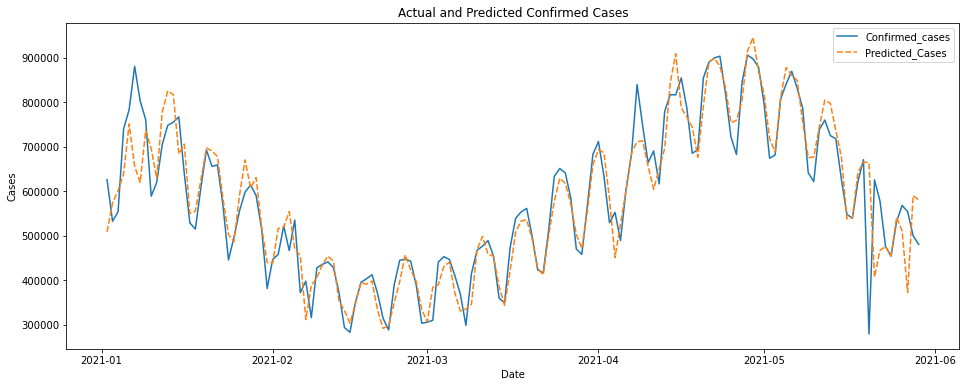

In [308]:
# Plotting true and predicted confirmed case for test data
plt.figure(figsize = (16,6))
plt.title('Actual and Predicted Confirmed Cases')
sns.lineplot(data = Test_df )
plt.xlabel('Date')
plt.ylabel('Cases')

In [309]:
# getting 100 dates in future from the last date
from datetime import date, timedelta
list3 = []
for i in range(100):
    list3.append((date(2021,5,29) + timedelta(i)).strftime("%Y-%m-%d"))

In [310]:
Forecasted_data = pd.DataFrame(list3,columns = ['Date'])

In [311]:
Forecasted_data['Forecasting'] = Forecasting

In [312]:
Forecasted_data

,Date,Forecasting
0,2021-05-29,431471.605923
1,2021-05-30,431471.605923
2,2021-05-31,431471.605923
3,2021-06-01,431471.605923
4,2021-06-02,431471.605923
...,...,...
95,2021-09-01,431471.605923
96,2021-09-02,431471.605923
97,2021-09-03,431471.605923
98,2021-09-04,431471.605923


In [313]:
# Forecasting 
# plt.figure(figsize = (16,6))
# plt.title('Forecasted Prediction')
# sns.lineplot(data =  )
# plt.xlabel('Date')
# plt.ylabel('Cases')

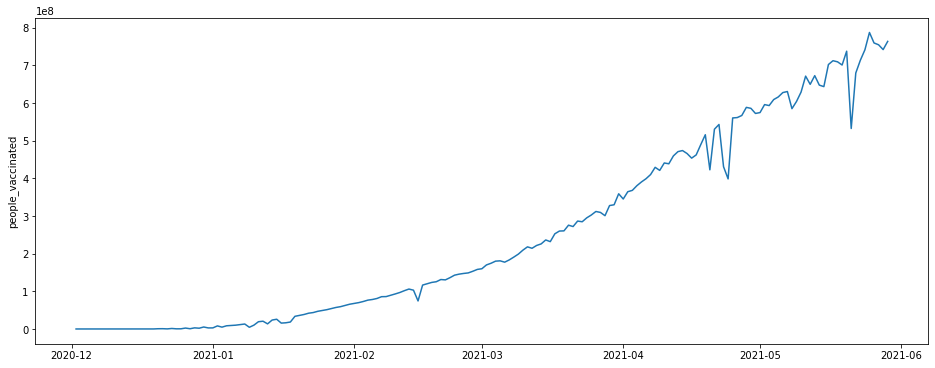

In [314]:
# Checking for any outlier
plt.figure(figsize= (16,6))
sns.lineplot(data = cases_vaccine_table, x = cases_vaccine_table.index, y = 'people_vaccinated')
plt.show()

## Checking for Stationarity in the Time Series

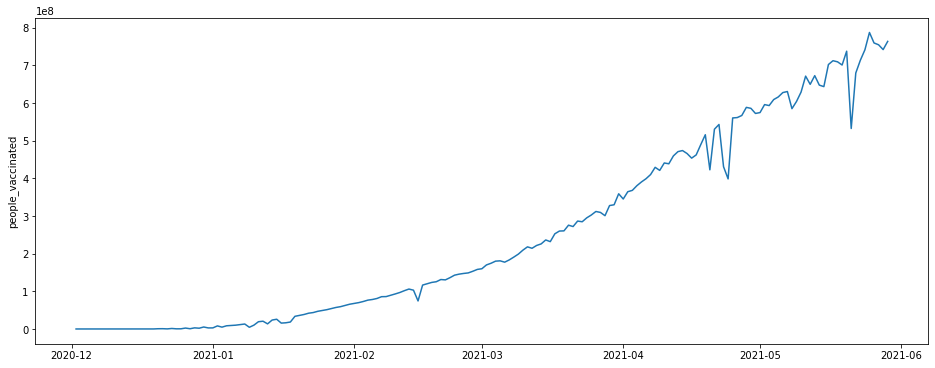

In [315]:
# Plotting graph for the time series
plt.figure(figsize= (16,6))
sns.lineplot(data = cases_vaccine_table, x = cases_vaccine_table.index, y = 'people_vaccinated')
plt.show()

In [316]:
# Summary Statistics
index1 = int(len(cases_vaccine_table['people_vaccinated']) / 2)
first_part_mean = np.array((cases_vaccine_table['people_vaccinated']))[0:index1].mean()
first_part_var = np.array((cases_vaccine_table['people_vaccinated']))[0:index1].var()
second_part_mean = np.array((cases_vaccine_table['people_vaccinated']))[index1+1:].mean()
second_part_var = np.array((cases_vaccine_table['people_vaccinated']))[index1+1:].var()
print('First_part_mean is', first_part_mean ,'and variance is',first_part_var)
print('Second_part_mean is', second_part_mean ,'and variance is',round(second_part_var))

First_part_mean is 44484040.56179775 and variance is 2451768535476282.0
Second_part_mean is 458044124.7303371 and variance is 33349373894068700


In [317]:
# Augmented Dickey-Fuller Statistical test
from statsmodels.tsa.stattools import adfuller
result = adfuller(cases_vaccine_table['people_vaccinated'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.240012
p-value: 1.000000
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


<b> As p value is greater than 0.05. We fail to reject the null hypothesis, that means the time Series is non-Stationary.</b>

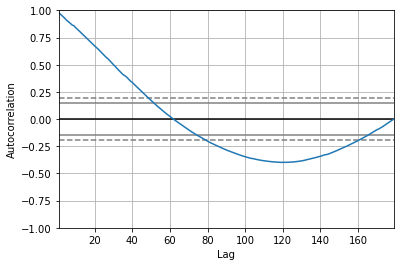

In [318]:
# AutoCorrelation Plot 
autocorrelation_plot(cases_vaccine_table['people_vaccinated'])
plt.show()

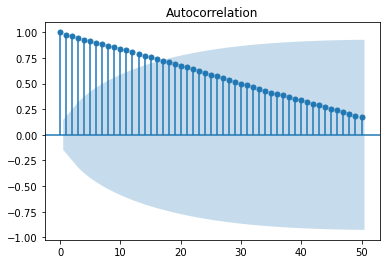

In [319]:
# Partial Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(cases_vaccine_table['people_vaccinated'] ,lags = 50)
plt.show()

In [320]:
X = cases_vaccine_table['people_vaccinated']
size = int(len(X) * 0.70)
train , test = X[0:size] , X[size:len(X)]
history = [x for x in train]
predictions = list()
Forecasting = list()

In [321]:
from pmdarima.arima import auto_arima

In [322]:
model_fit = auto_arima(train,start_p = 0, d = 1, start_q = 0,max_p = 50,max_d = 5, max_q = 15,start_P = 0,D =1, start_Q = 0
                       , max_P = 50,max_D = 5, max_Q = 15,m = 12, seasonal = True,error_action = 'warn',trace = True, 
                       supress_warnings = True,stepwise = True,random_state = 20, n_fits = 50) 
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3929.072, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3892.545, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3881.335, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3896.291, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3883.228, Time=0.19 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3883.046, Time=0.30 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3887.899, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3884.193, Time=0.82 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3906.207, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3882.783, Time=0.28 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3883.384, Time=0.24 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3881.871, Time=0.17 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=3884.244, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=3886.293, Time=0.21 sec

Best model:  ARIMA

In [323]:
Forecasting = list()

In [324]:
for t in range(len(test) + 100): 
    model = ARIMA(cases_vaccine_table['daily_vaccinations'], order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    if t >= 54:
        Forecasting.append(yhat)
        print('Forecasted data:- ', (yhat))
    else:
        predictions.append(yhat)
        obs = test.iloc[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=398972451.000000
predicted=32946266.631433, expected=410041651.000000
predicted=32946266.631433, expected=429227276.000000
predicted=32946266.631433, expected=421046427.000000

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:


predicted=32946266.631433, expected=440762638.000000
predicted=32946266.631433, expected=438608287.000000
predicted=32946266.631433, expected=459524003.000000

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:


predicted=32946266.631433, expected=470865945.000000
predicted=32946266.631433, expected=473733433.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=465839124.000000
predicted=32946266.631433, expected=453631675.000000
predicted=32946266.631433, expected=462182138.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=489476963.000000
predicted=32946266.631433, expected=515765191.000000
predicted=32946266.631433, expected=422633493.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=530429860.000000
predicted=32946266.631433, expected=543002897.000000
predicted=32946266.631433, expected=430820888.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=398462895.000000
predicted=32946266.631433, expected=560339144.000000
predicted=32946266.631433, expected=561318215.000000
predicted=32946266.631433, expected=566842448.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=588400222.000000
predicted=32946266.631433, expected=585858137.000000
predicted=32946266.631433, expected=572253128.000000
predicted=32946266.631433, expected=574584402.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=595797738.000000
predicted=32946266.631433, expected=593217096.000000
predicted=32946266.631433, expected=609151758.000000
predicted=32946266.631433, expected=616102376.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=627712368.000000
predicted=32946266.631433, expected=630490750.000000
predicted=32946266.631433, expected=585000054.000000
predicted=32946266.631433, expected=604080284.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=628983550.000000
predicted=32946266.631433, expected=671377047.000000
predicted=32946266.631433, expected=649555445.000000
predicted=32946266.631433, expected=672606062.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=647491891.000000
predicted=32946266.631433, expected=643518388.000000
predicted=32946266.631433, expected=702184709.000000
predicted=32946266.631433, expected=712286772.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=709360966.000000
predicted=32946266.631433, expected=700863118.000000
predicted=32946266.631433, expected=737586936.000000
predicted=32946266.631433, expected=532332659.000000

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:


predicted=32946266.631433, expected=679667409.000000
predicted=32946266.631433, expected=713461983.000000


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

predicted=32946266.631433, expected=741212418.000000
predicted=32946266.631433, expected=787306323.000000
predicted=32946266.631433, expected=759459715.000000
predicted=32946266.631433, expected=754607770.000000

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:


predicted=32946266.631433, expected=741814911.000000
predicted=32946266.631433, expected=763623681.000000
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:- 

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

 32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:- 

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

 32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:- 

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

 32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:- 

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

 32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:- 

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

 32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:- 

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

 32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:- 

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

 32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924
Forecasted data:-  32946266.631432924


C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\satyaki dixit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

## Prediction using Deep Learning

<b> Deep Nueral Network </b>

In [325]:
Cases_per_day['Confirmed_cases']

0          98.0
1         286.0
2         492.0
3         685.0
4         809.0
         ...   
488    531845.0
489    568216.0
490    554368.0
491    499934.0
492    480835.0
Name: Confirmed_cases, Length: 492, dtype: float64

In [326]:
# Creating features of size lookup with label as the next time step
def vec2matrix(data, lookup):
    X = []
    Y = []
    for i in range(len(data) - lookup):
        d = i + lookup
        X.append(data[i:d])
        Y.append(data[d])
    return np.array(X), np.array(Y) 

In [327]:
# Creating training and test dataset 
train_size = int(len(Cases_per_day['Confirmed_cases']) * .70)
train , test = np.asarray(Cases_per_day['Confirmed_cases'][0:train_size]) ,np.asarray(Cases_per_day['Confirmed_cases'][train_size:])
lookback = 10
trainX, trainY = vec2matrix(train, lookback)
testX, testY = vec2matrix(test, lookback)

In [328]:
# import keras librares to design and train the model
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [329]:
# creating the model
def Model_dnn(lookback):
    model = Sequential()
    model.add(Dense(units=32,input_dim = lookback, activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [330]:
# fitting data into the model
model = Model_dnn(lookback)
history = model.fit(trainX,trainY,epochs = 100,batch_size = 30,verbose = 2,validation_data=(testX,testY),callbacks= [EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Epoch 1/100
12/12 - 1s - loss: 53683789824.0000 - mse: 53683789824.0000 - mae: 179225.7344 - val_loss: 161801043968.0000 - val_mse: 161801027584.0000 - val_mae: 378164.9062
Epoch 2/100
12/12 - 0s - loss: 34480414720.0000 - mse: 34480414720.0000 - mae: 143027.8750 - val_loss: 90904174592.0000 - val_mse: 90904174592.0000 - val_mae: 274053.1562
Epoch 3/100
12/12 - 0s - loss: 12539924480.0000 - mse: 12539924480.0000 - mae: 82370.7812 - val_loss: 25122641920.0000 - val_mse: 25122641920.0000 - val_mae: 127547.8516
Epoch 4/100
12/12 - 0s - loss: 3326846464.0000 - mse: 3326846464.0000 - mae: 38991.2227 - val_loss: 14929920000.0000 - val_mse: 14929920000.0000 - val_mae: 100009.6094
Epoch 5/100
12/12 - 0s - loss: 4405376000.0000 - mse: 4405376000.0000 - mae: 38291.4727 - val_loss: 19567693824.0000 - val_mse: 19567693824.0000 - val_mae: 108922.3281
Epoch 6/100
12/12 - 0s - loss: 3429423872.0000 - mse: 3429423872.0000 - mae: 35528.3516 - val_loss: 14674945024.0000 - val_mse: 14674945024.0000 - val

In [331]:
# function for plotting trainig_loss and val_loss
def model_loss(history):
    plt.figure(figsize=(16,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

In [332]:
# Evaluating model on training data 
train_score = model.evaluate(trainX,trainY,verbose = 1)

11/11 [==============================] - 0s 2ms/step - loss: 679534272.0000 - mse: 679534272.0000 - mae: 15921.9248


In [333]:
# Compute root mean Squared Error and Mean Absolute error for training data
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' % (np.sqrt(train_score[1]), train_score[2]))

Train Root Mean Squared Error(RMSE): 26067.88; Train Mean Absolute Error(MAE) : 15921.92 


In [334]:
# Evaluating model on test data 
test_score = model.evaluate(testX, testY,verbose = 1)

5/5 [==============================] - 0s 2ms/step - loss: 3890016000.0000 - mse: 3890016000.0000 - mae: 44057.9844


In [335]:
#Compute root mean Squared Error and Mean Absolute error for test data
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' % (np.sqrt(test_score[1]), test_score[2]))

Test Root Mean Squared Error(RMSE): 62369.99; Test Mean Absolute Error(MAE) : 44057.98 


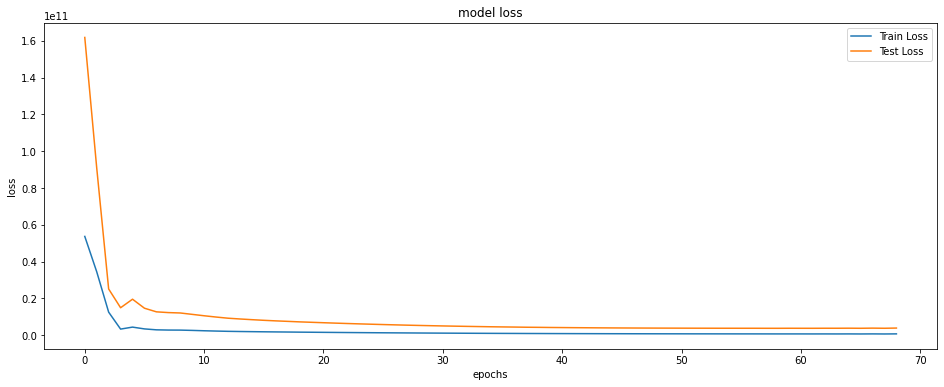

In [336]:
# Plotting the train and test loss for each epoch
model_loss(history)

In [337]:
# predicting values for test data
test_predict = model.predict(testX)

In [338]:
# plot of actual and predicted confirmed cases for the test data
def prediction_plot(testY, test_predict):
    len_prediction=[x for x in range(len(testY))]
    plt.figure(figsize=(16,6))
    plt.plot(len_prediction, testY, marker='.', label="actual")
    plt.plot(len_prediction, test_predict, 'r', label="prediction")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Confirmed_cases', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show();

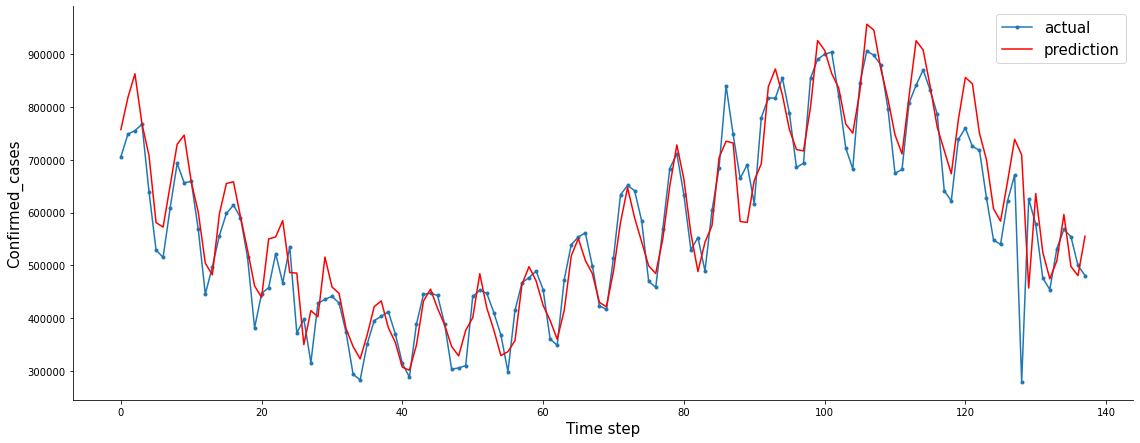

In [339]:
prediction_plot(testY, test_predict)

In [340]:
# Creating Forecast for 100 days from last date
Forecast = []
for i in range(len(test_predict) - lookback , len(test_predict)):
    Forecast.append(test_predict[i][0])

In [341]:
#100 Day Prediction
for i in range(100):
    Forecast.append(model.predict(np.array(Forecast[i:len(Forecast)]).reshape(-1,10))[-1][0])
Forecast = Forecast[10:len(Forecast)]

In [342]:
from datetime import timedelta

In [343]:
# Make a list of the dates after the last date
Date = Cases_per_day['Date'].iloc[-1].date()
Dates = []
for i in range(1,101):
    Date = Date + timedelta(days =1)
    Dates.append(Date)

In [344]:
Predicted_data =  pd.DataFrame(Forecast, columns = ['Forescasted_Cofirmed_Cases'])
Predicted_data['Dates'] = Dates
Predicted_data.set_index(['Dates'], inplace = True)

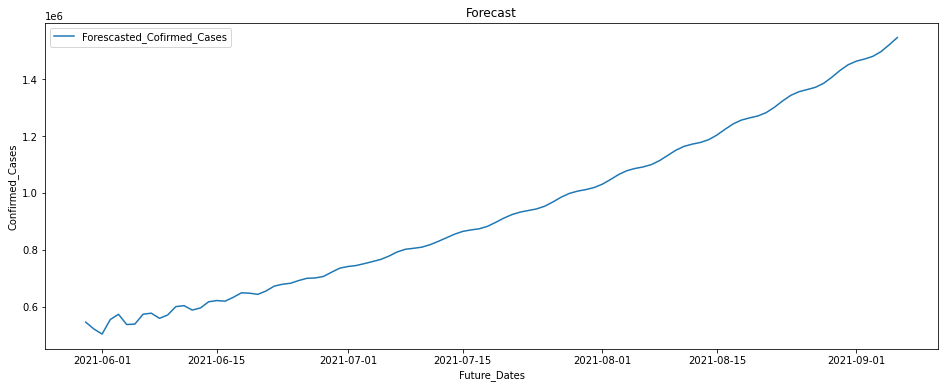

In [345]:
# Plot of the Forecast for 100 days
plt.figure(figsize = (16,6))
sns.lineplot(data = Predicted_data)
plt.ylabel('Confirmed_Cases')
plt.xlabel('Future_Dates')
plt.title('Forecast')
plt.show()

## Vaccinations

In [346]:
# Creating training and test dataset 
train_size = int(len(cases_vaccine_table['daily_vaccinations']) * .70)
train , test = np.asarray(cases_vaccine_table['daily_vaccinations'][0:train_size]) ,np.asarray(cases_vaccine_table['daily_vaccinations'][train_size:])
lookback = 10
trainX, trainY = vec2matrix(train, lookback)
testX, testY = vec2matrix(test, lookback)

In [347]:
def Model_dnn(lookback):
    model = Sequential()
    model.add(Dense(units = 32,input_dim = lookback, activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae','mse'])
    return model

In [348]:
model = Model_dnn(lookback)
history = model.fit(trainX,trainY,epochs = 100,batch_size = 30,verbose = 2,validation_data=(testX,testY),callbacks= [EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Epoch 1/100
4/4 - 1s - loss: 52607418630144.0000 - mae: 5719581.0000 - mse: 52607418630144.0000 - val_loss: 485616953327616.0000 - val_mae: 21507470.0000 - val_mse: 485616953327616.0000
Epoch 2/100
4/4 - 0s - loss: 49208954454016.0000 - mae: 5529204.0000 - mse: 49208954454016.0000 - val_loss: 457150279188480.0000 - val_mae: 20880740.0000 - val_mse: 457150279188480.0000
Epoch 3/100
4/4 - 0s - loss: 46550873014272.0000 - mae: 5380085.0000 - mse: 46550873014272.0000 - val_loss: 429362310545408.0000 - val_mae: 20226616.0000 - val_mse: 429362310545408.0000
Epoch 4/100
4/4 - 0s - loss: 43828190904320.0000 - mae: 5220046.0000 - mse: 43828190904320.0000 - val_loss: 403326017470464.0000 - val_mae: 19580442.0000 - val_mse: 403326017470464.0000
Epoch 5/100
4/4 - 0s - loss: 41174320545792.0000 - mae: 5062971.0000 - mse: 41174320545792.0000 - val_loss: 376695408295936.0000 - val_mae: 18920478.0000 - val_mse: 376695408295936.0000
Epoch 6/100
4/4 - 0s - loss: 38548661075968.0000 - mae: 4901462.5000 -

In [349]:
# function for plotting trainig_loss and val_loss
train_score = model.evaluate(trainX,trainY,verbose = 1)

4/4 [==============================] - 0s 2ms/step - loss: 215139827712.0000 - mae: 373795.0000 - mse: 215139827712.0000


Train Root Mean Squared Error(RMSE): 611.39; Train Mean Absolute Error(MAE) : 215139827712.00 
2/2 [==============================] - 0s 4ms/step - loss: 3298314420224.0000 - mae: 1365260.1250 - mse: 3298314420224.0000
Test Root Mean Squared Error(RMSE): 1168.44; Test Mean Absolute Error(MAE) : 3298314420224.00 


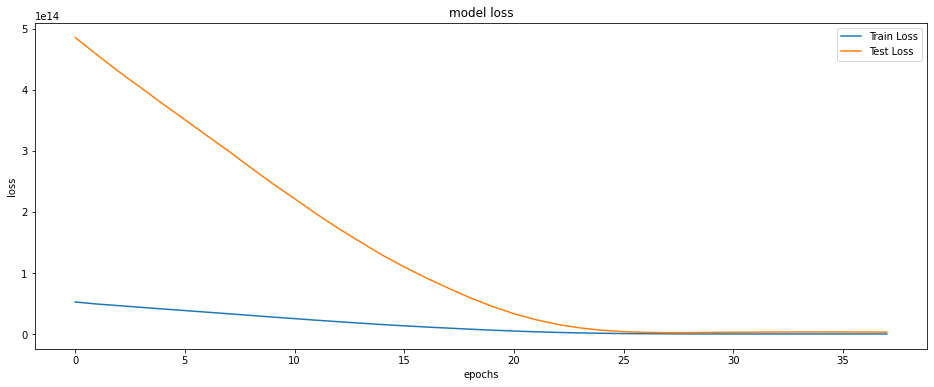

In [350]:
# Compute root mean Squared Error and Mean Absolute error for training data
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' % (np.sqrt(train_score[1]), train_score[2]))

# Evaluating model on test data 
test_score = model.evaluate(testX, testY,verbose = 1)

#Compute root mean Squared Error and Mean Absolute error for test data
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' % (np.sqrt(test_score[1]), test_score[2]))

# Plotting the train and test loss for each epoch
model_loss(history)

# predicting values for test data
test_predict = model.predict(testX)

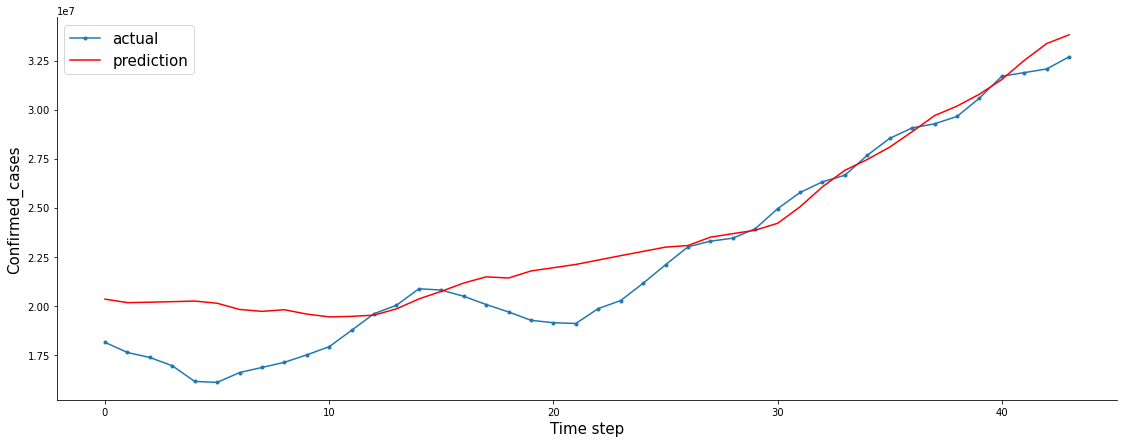

In [351]:
prediction_plot(testY, test_predict)

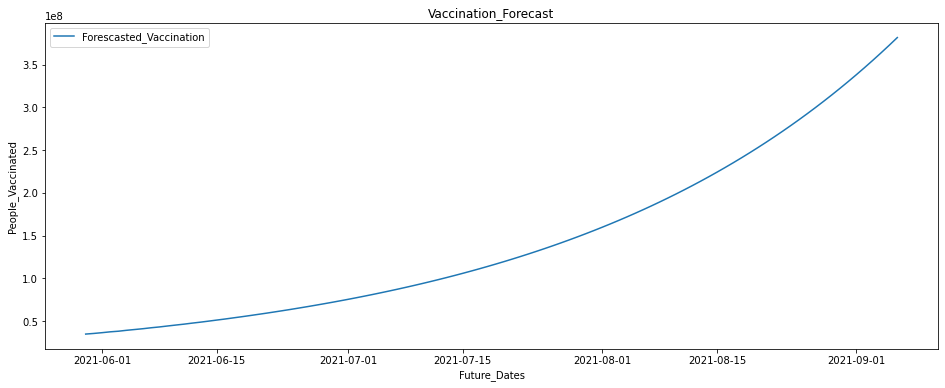

In [352]:
# Creating Forecast for 100 days from last date
Forecast = []
for i in range(len(test_predict) - lookback , len(test_predict)):
    Forecast.append(test_predict[i][0])

#100 Day Prediction
for i in range(100):
    Forecast.append(model.predict(np.array(Forecast[i:len(Forecast)]).reshape(-1,10))[-1][0])
Forecast = Forecast[10:len(Forecast)]

from datetime import timedelta

# Make a list of the dates after the last date
Date = Cases_per_day['Date'].iloc[-1].date()
Dates = []
for i in range(1,101):
    Date = Date + timedelta(days =1)
    Dates.append(Date)

Predicted_data =  pd.DataFrame(Forecast, columns = ['Forescasted_Vaccination'])
Predicted_data['Dates'] = Dates
Predicted_data.set_index(['Dates'], inplace = True)

# Plot of the Forecast for 100 days
plt.figure(figsize = (16,6))
sns.lineplot(data = Predicted_data)
plt.ylabel('People_Vaccinated')
plt.xlabel('Future_Dates')
plt.title('Vaccination_Forecast')
plt.show()

## Recurrent Nueral Network

In [353]:
train_size = int(len(Cases_per_day['Confirmed_cases']) * .70)
train , test = Cases_per_day['Confirmed_cases'][0:train_size], Cases_per_day['Confirmed_cases'][train_size:]
lookback = 10
tot = [len(test) + len(train)]
train = np.append(train, np.repeat(train[len(train)],lookback))
test = np.append(test, np.repeat(test[tot],lookback))
trainX,trainY =vec2matrix(train,lookback)
testX,testY =vec2matrix(test, lookback)
# reshape input to be [samples, window size, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [354]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping
def model_rnn(lookback):
    model=Sequential()
    model.add(SimpleRNN(units=32, input_shape=(1,lookback), activation="relu"))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [355]:
model=model_rnn(lookback)
history=model.fit(trainX,trainY, epochs=100, batch_size=30, verbose=1, validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Epoch 1/100
12/12 [==============================] - 2s 42ms/step - loss: 55638371966.4615 - mse: 55638371966.4615 - mae: 153677.3869 - val_loss: 448126910464.0000 - val_mse: 448126910464.0000 - val_mae: 645481.1875
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 40741914786.7692 - mse: 40741914786.7692 - mae: 131002.8191 - val_loss: 327947321344.0000 - val_mse: 327947321344.0000 - val_mae: 550064.6875
Epoch 3/100
12/12 [==============================] - ETA: 0s - loss: 13508421.0000 - mse: 13508421.0000 - mae: 2610.27 - 0s 16ms/step - loss: 29535550538.2308 - mse: 29535550533.3077 - mae: 111704.5416 - val_loss: 232033189888.0000 - val_mse: 232033189888.0000 - val_mae: 460698.3125
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 20452774261.8462 - mse: 20452774261.8462 - mae: 93565.5977 - val_loss: 145246076928.0000 - val_mse: 145246076928.0000 - val_mae: 363187.4062
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - lo

In [356]:
from sklearn.metrics import mean_absolute_error

Train Root Mean Squared Error(RMSE): 27730.86; Train Mean Absolute Error(MAE) : 17137.21 
Test Root Mean Squared Error(RMSE): 62846.21; Test Mean Absolute Error(MAE) : 42557.58 


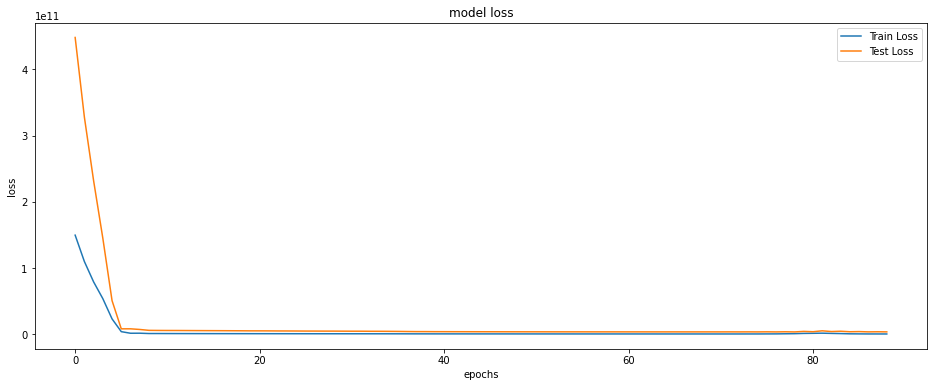

In [357]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '
      % (np.sqrt(mean_squared_error(trainY, train_predict[:,0])), mean_absolute_error(trainY, train_predict[:,0])))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
      % (np.sqrt(mean_squared_error(testY, test_predict[:,0])), mean_absolute_error(testY, test_predict[:,0])))
model_loss(history)

In [358]:
test_predict = model.predict(testX)

In [359]:
def prediction_plot(testY, test_predict,look_back):
    len_prediction=[x for x in range(len(testY)-look_back)]
    plt.plot(len_prediction, testY[:-10], marker='.', label="actual")
    plt.plot(len_prediction, test_predict[:-10], 'r', label="prediction")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Ads Daily Spend', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show()

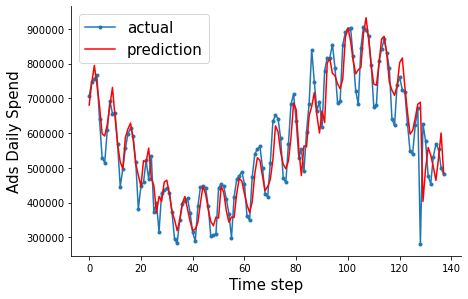

In [360]:
prediction_plot(testY,test_predict,lookback)

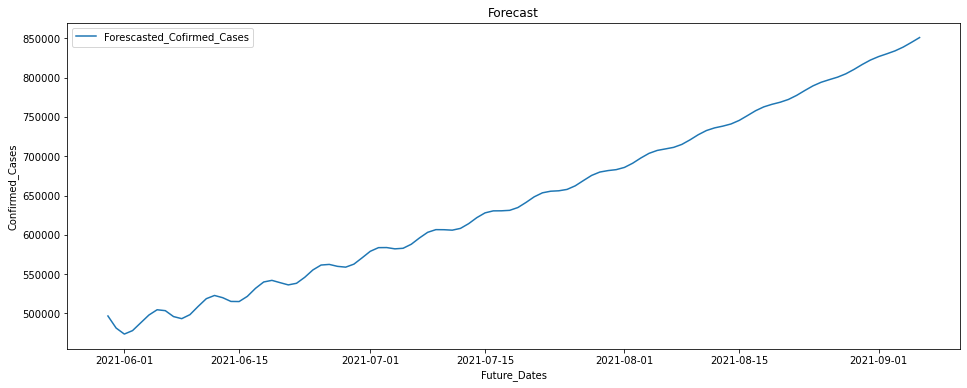

In [361]:
Forecast = []
for i in range(len(test_predict) - lookback , len(test_predict)):
    Forecast.append(test_predict[i][0])

#100 Day Prediction
for i in range(100):
    Forecast.append(model.predict(np.array(Forecast[i:len(Forecast)]).reshape(-1,1,10))[-1][0])
Forecast = Forecast[10:len(Forecast)]

Predicted_data =  pd.DataFrame(Forecast, columns = ['Forescasted_Cofirmed_Cases'])
Predicted_data['Dates'] = Dates
Predicted_data.set_index(['Dates'], inplace = True)

plt.figure(figsize = (16,6))
sns.lineplot(data = Predicted_data)
plt.ylabel('Confirmed_Cases')
plt.xlabel('Future_Dates')
plt.title('Forecast')
plt.show()

## Vaccination

In [362]:
train_size = int(len(cases_vaccine_table['daily_vaccinations']) * .70)
train , test = cases_vaccine_table['daily_vaccinations'][0:train_size], cases_vaccine_table['daily_vaccinations'][train_size:]
lookback = 10
train = np.append(train, np.repeat(train[-1],lookback))
test = np.append(test, np.repeat(test[-1],lookback))
trainX,trainY =vec2matrix(train,lookback)
testX,testY =vec2matrix(test, lookback)
# reshape input to be [samples, window size, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [363]:
model=model_rnn(lookback)
history=model.fit(trainX,trainY, epochs=100, batch_size=30, verbose=1, validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Epoch 1/100
5/5 [==============================] - 4s 221ms/step - loss: 23734135969109.3320 - mse: 23734135969109.3320 - mae: 3536892.6562 - val_loss: 278824780562432.0000 - val_mse: 278824780562432.0000 - val_mae: 16198981.0000
Epoch 2/100
5/5 [==============================] - 0s 27ms/step - loss: 15514389938176.0000 - mse: 15514389938176.0000 - mae: 2883188.8021 - val_loss: 177272594104320.0000 - val_mse: 177272594104320.0000 - val_mae: 12817828.0000
Epoch 3/100
5/5 [==============================] - 0s 23ms/step - loss: 10234730872832.0000 - mse: 10234730872832.0000 - mae: 2372352.2188 - val_loss: 106591391055872.0000 - val_mse: 106591391055872.0000 - val_mae: 9839160.0000
Epoch 4/100
5/5 [==============================] - 0s 26ms/step - loss: 6398247862272.0000 - mse: 6398247774890.6670 - mae: 1907712.6875 - val_loss: 59836490317824.0000 - val_mse: 59836490317824.0000 - val_mae: 7219615.5000
Epoch 5/100
5/5 [==============================] - 0s 22ms/step - loss: 4188827893760.000

Train Root Mean Squared Error(RMSE): 213333.59; Train Mean Absolute Error(MAE) : 140170.05 
Test Root Mean Squared Error(RMSE): 779233.78; Test Mean Absolute Error(MAE) : 581311.78 


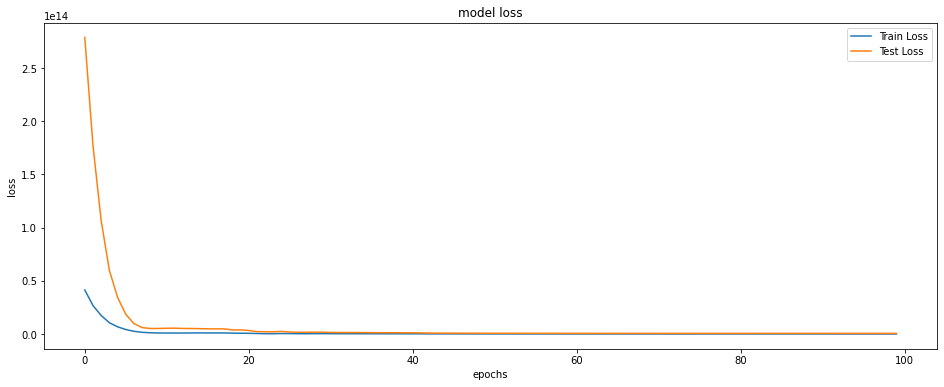

In [364]:
from sklearn.metrics import mean_absolute_error

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '
      % (np.sqrt(mean_squared_error(trainY, train_predict[:,0])), mean_absolute_error(trainY, train_predict[:,0])))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
      % (np.sqrt(mean_squared_error(testY, test_predict[:,0])), mean_absolute_error(testY, test_predict[:,0])))
model_loss(history)

test_predict = model.predict(testX)

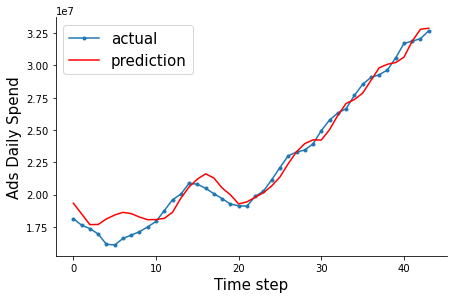

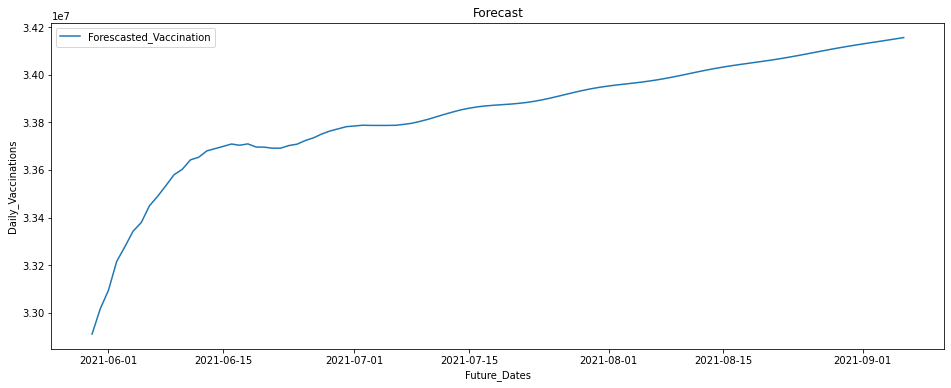

In [365]:
prediction_plot(testY,test_predict,lookback)

Forecast = []
for i in range(len(test_predict) - lookback , len(test_predict)):
    Forecast.append(test_predict[i][0])

#100 Day Prediction
for i in range(100):
    Forecast.append(model.predict(np.array(Forecast[i:len(Forecast)]).reshape(-1,1,10))[-1][0])
Forecast = Forecast[10:len(Forecast)]

Predicted_data =  pd.DataFrame(Forecast, columns = ['Forescasted_Vaccination'])
Predicted_data['Dates'] = Dates
Predicted_data.set_index(['Dates'], inplace = True)

plt.figure(figsize = (16,6))
sns.lineplot(data = Predicted_data)
plt.ylabel('Daily_Vaccinations')
plt.xlabel('Future_Dates')
plt.title('Forecast')
plt.show()

## LSTM

In [366]:
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [367]:
df_arr= Cases_per_day['Confirmed_cases'].values 
df_arr = np.reshape(df_arr, (-1, 1)) #LTSM requires more input features compared to RNN or DNN
scaler = MinMaxScaler(feature_range=(0, 1))#LTSM is senstive to the scale of features
df_arr = scaler.fit_transform(df_arr)

In [368]:
train_size = int(len(df_arr) * .70)
train , test = df_arr[0:train_size], df_arr[train_size:]
lookback = 10
trainX,trainY =vec2matrix(train,lookback)
testX,testY =vec2matrix(test, lookback)
# reshape input to be [samples, window size, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [369]:
# A simple 2 layer LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
def model_lstm(look_back):
    model=Sequential()
    model.add(LSTM(100, input_shape=(1, look_back), activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [370]:
model=model_lstm(lookback)

In [371]:
history = model.fit(trainX, trainY, epochs=100, batch_size=30, validation_data=(testX, testY), callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/100
12/12 [==============================] - 2s 41ms/step - loss: 0.0391 - mse: 0.0391 - mae: 0.1296 - val_loss: 0.2949 - val_mse: 0.2949 - val_mae: 0.5179
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0211 - mse: 0.0211 - mae: 0.0942 - val_loss: 0.1657 - val_mse: 0.1657 - val_mae: 0.3822
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0665 - val_loss: 0.0734 - val_mse: 0.0734 - val_mae: 0.2456
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0528 - val_loss: 0.0228 - val_mse: 0.0228 - val_mae: 0.1236
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0561 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0821
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0665 - val_loss: 0.0136 - val_mse: 0.0136 - val_mae: 0.0892
Epoch 7/100
12/12 [==

Train Root Mean Squared Error(RMSE): 48617.83; Train Mean Absolute Error(MAE) : 37168.41 
Test Root Mean Squared Error(RMSE): 106772.44; Test Mean Absolute Error(MAE) : 82286.70 


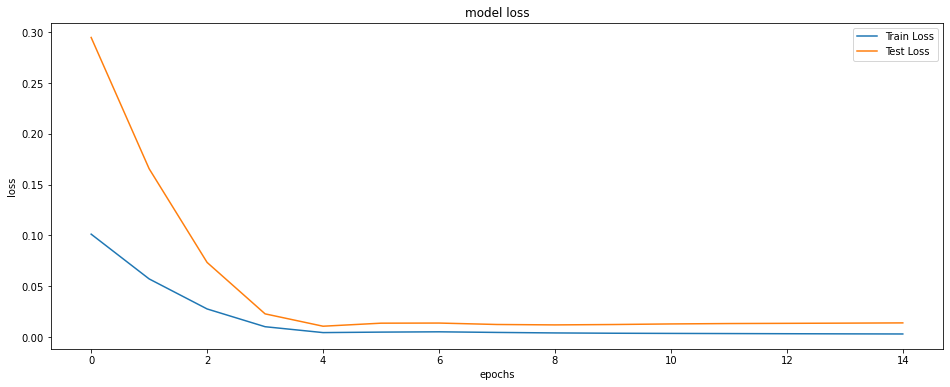

In [372]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform(trainY)
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform(testY)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '% (np.sqrt(mean_squared_error(trainY, train_predict[:,0])),(mean_absolute_error(trainY, train_predict[:,0]))))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f '% (np.sqrt(mean_squared_error(testY, test_predict[:,0])),(mean_absolute_error(testY, test_predict[:,0]))))
model_loss(history)

In [373]:
def prediction_plot(testY, test_predict,look_back):
    len_prediction=[x for x in range(len(testY))]
    plt.figure(figsize = (16,6))
    plt.plot(len_prediction, testY, marker='.', label="actual")
    plt.plot(len_prediction, test_predict,'r', label="prediction")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Ads Daily Spend', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show()

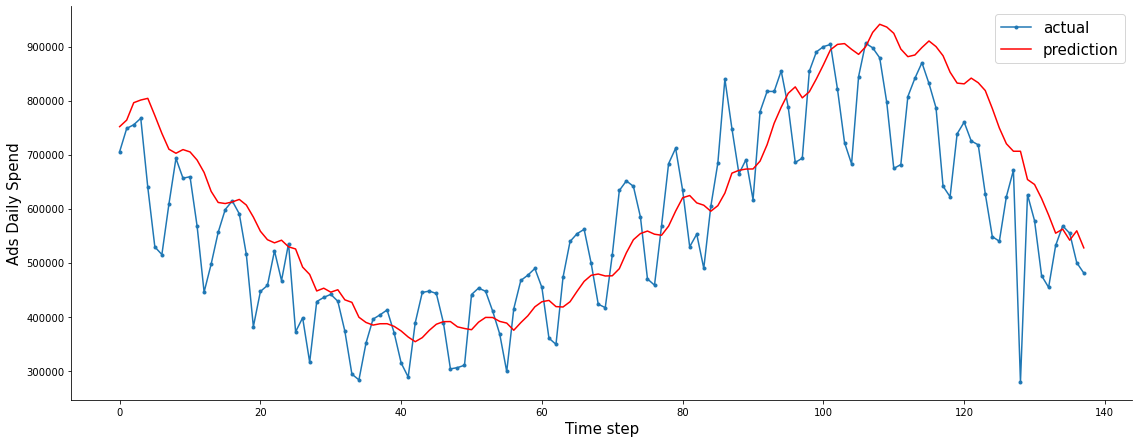

In [374]:
prediction_plot(testY, test_predict,lookback)

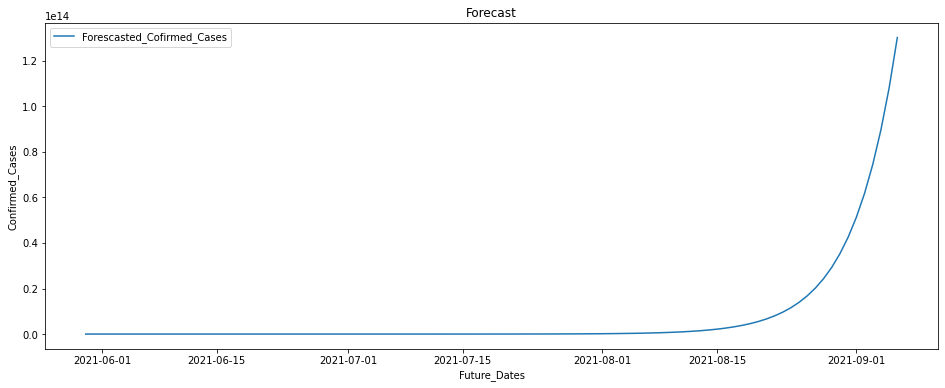

In [375]:
Forecast = []
for i in range(len(test_predict) - lookback , len(test_predict)):
    Forecast.append(test_predict[i][0])

#100 Day Prediction
for i in range(100):
    Forecast.append(model.predict(np.array(Forecast[i:len(Forecast)]).reshape(-1,1,10))[-1][0])
Forecast = Forecast[10:len(Forecast)]

Predicted_data =  pd.DataFrame(Forecast, columns = ['Forescasted_Cofirmed_Cases'])
Predicted_data['Dates'] = Dates
Predicted_data.set_index(['Dates'], inplace = True)

plt.figure(figsize = (16,6))
sns.lineplot(data = Predicted_data)
plt.ylabel('Confirmed_Cases')
plt.xlabel('Future_Dates')
plt.title('Forecast')
plt.show()

## Vaccination

In [376]:
df_arr= cases_vaccine_table['daily_vaccinations'].values 
df_arr = np.reshape(df_arr, (-1, 1)) #LTSM requires more input features compared to RNN or DNN
scaler = MinMaxScaler(feature_range=(0, 1)) #LTSM is senstive to the scale of features
df_arr = scaler.fit_transform(df_arr)

In [377]:
train_size = int(len(df_arr) * .70)
train , test = df_arr[0:train_size], df_arr[train_size:]
lookback = 10
trainX,trainY =vec2matrix(train,lookback)
testX,testY =vec2matrix(test, lookback)
# reshape input to be [samples, window size, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [378]:
model=model_lstm(lookback)
history = model.fit(trainX, trainY, epochs=100, batch_size=30, validation_data=(testX, testY), callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/100
4/4 [==============================] - 3s 155ms/step - loss: 0.0281 - mse: 0.0281 - mae: 0.1174 - val_loss: 0.5036 - val_mse: 0.5036 - val_mae: 0.6923
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0236 - mse: 0.0236 - mae: 0.1046 - val_loss: 0.4439 - val_mse: 0.4439 - val_mae: 0.6494
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0198 - mse: 0.0198 - mae: 0.0944 - val_loss: 0.3877 - val_mse: 0.3877 - val_mae: 0.6060
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0166 - mse: 0.0166 - mae: 0.0861 - val_loss: 0.3357 - val_mse: 0.3357 - val_mae: 0.5631
Epoch 5/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0138 - mse: 0.0138 - mae: 0.0790 - val_loss: 0.2881 - val_mse: 0.2881 - val_mae: 0.5209
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0727 - val_loss: 0.2459 - val_mse: 0.2459 - val_mae: 0.4805
Epoch 7/100
4/4 [==========

Train Root Mean Squared Error(RMSE): 877672.59; Train Mean Absolute Error(MAE) : 747384.59 
Test Root Mean Squared Error(RMSE): 2273794.26; Test Mean Absolute Error(MAE) : 1857525.36 


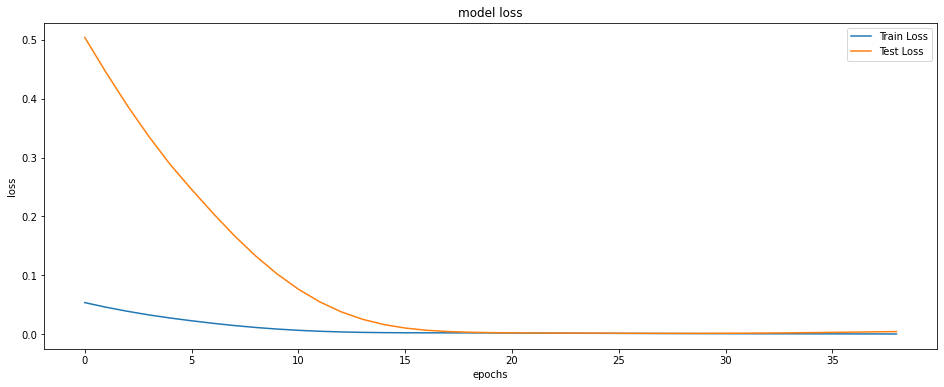

In [379]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform(trainY)
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform(testY)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '% (np.sqrt(mean_squared_error(trainY, train_predict[:,0])),(mean_absolute_error(trainY, train_predict[:,0]))))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f '% (np.sqrt(mean_squared_error(testY, test_predict[:,0])),(mean_absolute_error(testY, test_predict[:,0]))))
model_loss(history)

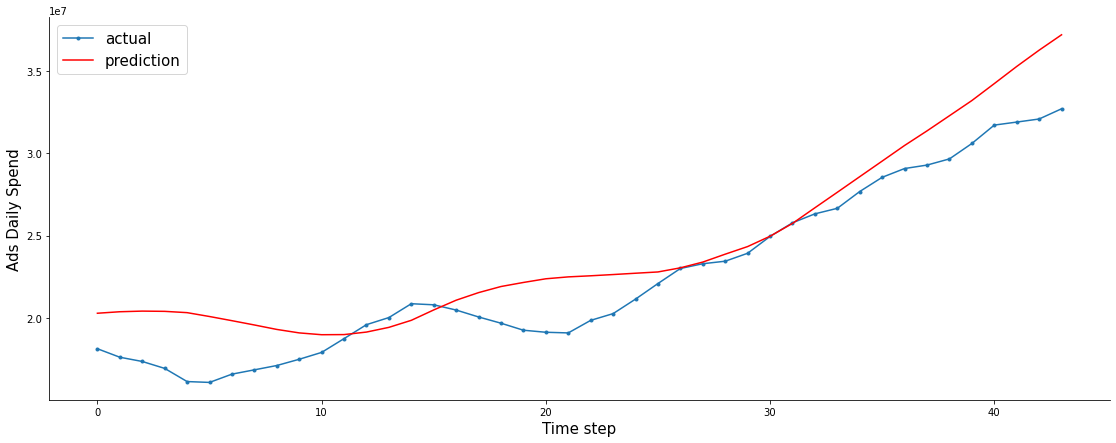

In [380]:
prediction_plot(testY, test_predict,lookback)

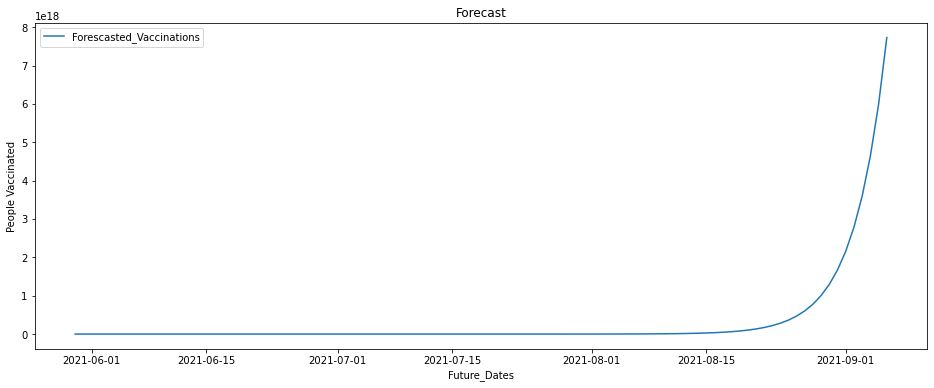

In [381]:
Forecast = []
for i in range(len(test_predict) - lookback , len(test_predict)):
    Forecast.append(test_predict[i][0])

#100 Day Prediction
for i in range(100):
    Forecast.append(model.predict(np.array(Forecast[i:len(Forecast)]).reshape(-1,1,10))[-1][0])
Forecast = Forecast[10:len(Forecast)]

Predicted_data =  pd.DataFrame(Forecast, columns = ['Forescasted_Vaccinations'])
Predicted_data['Dates'] = Dates
Predicted_data.set_index(['Dates'], inplace = True)

plt.figure(figsize = (16,6))
sns.lineplot(data = Predicted_data)
plt.ylabel('People Vaccinated')
plt.xlabel('Future_Dates')
plt.title('Forecast')
plt.show()